# Sistema de $N$ especies en competencia.

24/agosto/2022

Resumen: la idea es generar el primer paso de mi tesis comprobando la ley circular dada por Robert May y extendida por Stefano. El objetivo es generar sistemas de 5 y 10 especies en competencia con valores aleatorios en la matriz de interacciones, y ver si cumple la ley circular.

Para ello, de entrada se necesitará que los valores propios de la matriz tengan parte real negativa.

In [1]:
using LinearAlgebra
using Plots

plotlyjs()

WebIO._IJuliaInit()

Plots.PlotlyJSBackend()

In [19]:
"""RK4

Runge-Kutta 4. Es un integrador para resolver sistemas de ecuaciones diferenciales aunque
probablemente también pueda resolver ecuaciones diferenciales normales.

Parámetros:

f := función de variables Real
x0 := condiciones iniciales del sistema dinámico
t0 := tiempo inicial
tf := tiempo final
h := paso de integración
"""

function RK4(f,x0,t0,tf,h)
    #=al igual que en la función de eulerND, definimos una matriz de dimensión 
    (número de iteraciones × dimensión del sistema dinámico) como conjunto solución=#
    t = range(t0, stop = tf, step = h)
    n = length(t)
    dim = length(x0)
    #lo hacemos en un arreglo de ceros
    xs = zeros(n,dim)
    #imponemos la condición inicial en el primer renglón
    xs[1,:] = x0
    #generamos un ciclo for con las iteraciones de runge-kutta de cuarto orden
    for i in  2:n
        k1 = f(xs[i-1,:])
        k2 = f(xs[i-1,:]+(h/2)*k1)
        k3 = f(xs[i-1,:]+(h/2)*k2)
        k4 = f(xs[i-1,:]+h*k3)
        
        xs[i,:] = xs[i-1,:] + (h/6)*(k1+2*k2+2*k3+k4)
    end
    #=regresamos el resultado en una tupla, con los tiempos en la primera entrada y 
    el conjunto solución en la segunda entrada=#
    return (t , xs)
end


RK4 (generic function with 1 method)

Utilizar la función `randn()` para generar númeror aleatorios bajo la distribución normal.

In [2]:
using Random
rng = MersenneTwister(1234)
randn!(rng, zeros(5,5))

5×5 Matrix{Float64}:
  0.867347   2.21188   -0.560501    0.110096    1.56417
 -0.901744   0.532813  -0.0192918  -0.251176   -1.39674
 -0.494479  -0.271735   0.128064    0.369714    1.1055
 -0.902914   0.502334   1.85278     0.0721164  -1.10673
  0.864401  -0.516984  -0.827763   -1.50343    -3.21136

In [19]:
function hola(X)
    A = [rand() rand();rand() rand()]
    return A*X
end

hola (generic function with 1 method)

In [20]:
hola([1,1])

2-element Vector{Float64}:
 0.5375190267892946
 1.4357404181506883

In [33]:
randn(5,5) - Matrix(1I,5,5)
#Matrix(1I,5,5)

5×5 Matrix{Float64}:
  0.240729   -0.854998    -0.314548  -0.918211  -0.664112
 -0.0637414  -1.35274     -0.193449  -0.150626  -0.452517
 -0.324812    0.00756373  -0.721251  -0.842769  -1.08491
 -0.468692    0.387738    -0.231456  -2.60038   -1.43034
 -0.249876    1.87454      0.660237  -0.193022   0.274436

### 30 enero 2023

In [1]:
include("../Codigo/main.jl")

WebIO._IJuliaInit()

sistemaLK (generic function with 1 method)

In [7]:
#Red aleatoria
M = randomMatrix(5,0.25)
display(M)
gplot(g,nodelabel = 1:5)

(sparse([1, 2, 3, 4, 2, 3, 2, 4, 5], [1, 2, 2, 2, 3, 3, 4, 4, 5], [0.9630191850930543, 1.1062746859235983, 0.44417653115292144, 1.2138734366058475, -0.8161322154740611, 1.4919563676200687, 1.4304983356241112, 1.012186276098995, 0.4637596307604109], 5, 5), SimpleGraph{Int64}(2, [Int64[], [3, 4], [2], [2], Int64[]]))

LoadError: UndefVarError: g not defined

In [8]:
x0 = [rand(), rand(), rand(), rand(), rand()]
#x0 = [rand(),1]
t0 = 0
tf = 20
dt = 0.1

t, sol = cincoEspecies(x0,t0,tf,dt,M)

LoadError: MethodError: no method matching *(::Tuple{SparseArrays.SparseMatrixCSC{Float64, Int64}, SimpleGraph{Int64}}, ::Vector{Float64})
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  *([91m::StridedMatrix{T}[39m, ::StridedVector{S}) where {T<:Union{Float32, Float64, ComplexF32, ComplexF64}, S<:Real} at ~/julia-1.8.4-linux-x86_64/julia-1.8.4/share/julia/stdlib/v1.8/LinearAlgebra/src/matmul.jl:49
[0m  *([91m::Union{SparseArrays.AbstractSparseMatrixCSC{TA, Ti}, SubArray{TA, 2, <:SparseArrays.AbstractSparseMatrixCSC{TA, Ti}, Tuple{Base.Slice{Base.OneTo{Int64}}, I}} where I<:AbstractUnitRange} where Ti[39m, ::Union{StridedVector, BitVector}) where TA at ~/julia-1.8.4-linux-x86_64/julia-1.8.4/share/julia/stdlib/v1.8/SparseArrays/src/linalg.jl:50
[0m  ...

In [9]:
plot(t,sol[:,1],label ="Especie 1",w=2)

plot!(t,sol[:,2],label ="Especie 2",w=2)
plot!(t,sol[:,3],label ="Especie 3",w=2)
plot!(t,sol[:,4],label ="Especie 4",w=2)
plot!(t,sol[:,5],label ="Especie 5",w=2)

LoadError: UndefVarError: sol not defined

In [10]:
plot(sol[:,1],sol[:,3],w=2,
    #xlabel = "Tiempo",
    xlabel = "Conejos",
    ylabel = "Ovejas",
    label = "",
)

LoadError: UndefVarError: sol not defined

Encontrar puntos fijos y averiguar si se trata de atractores o repulsores. Aquí mi primera interpretación es que las ovejas ganan y los conejos se extinguen.

## 7 de febrero 2022

Continuamos con el trabajo revisando fallas de los modelos. Vamos a hacer pruebas para 2 especies y de ahí extenderlo a los otros sistemas.

$$
\frac{dx_i}{dt}=r_ix_i\left(1-\frac{\sum_{j=1}^N \alpha_{ij}x_j}{K_i}\right)
$$





\begin{cases}
\dot{x}_1&=r_1x_1(1-\frac{a_{11}x_1}{k_1}-\frac{a_{12}x_1x_2}{k_1})\\
\dot{x}_2&=r_2x_2(1-\frac{a_{21}x_2}{k_2}-\frac{a_{22}x_1x_2}{k_2})
\end{cases}

In [1]:
include("../Codigo/main.jl")

WebIO._IJuliaInit()

redAleatoria (generic function with 1 method)

2×2 Matrix{Float64}:
 0.0523122  0.0
 0.0        0.103384

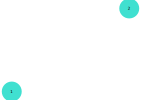

In [2]:
A,g = randomMatrix(2,0.6)
display(A)
gplot(g,nodelabel = 1:2)

In [3]:
x0 = sample(1:0.1:4,2)
t0 = 0
tf = 20
dt = 0.1

t, sol = pruebas(x0,t0,tf,dt,A)

(0.0:0.1:20.0, [3.6 1.8; 4.307248305793326 2.378111250730561; … ; 38.231982387988 29.018017710199373; 38.231982387988 29.018017710199373])

In [4]:
p1 = plot(t,sol[:,1],label ="Especie 1",w=2)
plot!(t,sol[:,2],label ="Especie 2",w=2)

p2 = plot(sol[:,1],sol[:,2],w=2,
    #xlabel = "Tiempo",
    xlabel = "Conejos",
    ylabel = "Ovejas",
    label = "",
    xlim = [0,4],
    ylim = [0,4]
)
scatter!((sol[1,1],sol[1,2]),label="T=t0")
plot(p1,p2,size=(900,400))

In [94]:
r = [2,3]
K = [2,3]
function prueba(X)
    sis = zeros(2)
    xs = zeros(2)
    for i in 1:2
        for j in 1:2
            xs[i] += A[i,j]*X[j]
        end
        sis[i] = r[i]*X[i]*(1-xs[i]/K[i])
    end
    return xs
end

prueba (generic function with 1 method)

# 10 de febrero 2023

Ya corregí el sistema, hice la respectiva prueba con un sistema de dos por dos, y encontré varios obstáculos; sobre todo aspectos del sistema que no estaban del todo correctos. Fueron corregidos con base en la función de la celda anterior y a continuación serán implementados en los sistemas de 5 y 10 especies. La idea es que estos sistemas respeten su capacidad de carga.

In [5]:
include("../Codigo/main.jl")

redAleatoria (generic function with 1 method)

\begin{cases}
\dot{x}_1&=0.5x_1(1-\frac{0.1x_1}{2}-\frac{0.7x_1x_2}{2})\\
\dot{x}_2&=0.7x_2(1-\frac{2.1x_2}{3}-\frac{1.2x_1x_2}{1.2}
\end{cases}

In [7]:
#A = [r1/k1 r1α/k1;r2β/k2 r2/k2]
#A = [0.5 0.7;2.1 1.2]
r = [0.3,0.7]
K = [2,3]
x0 = [1.7,0.4]
t0 = 0
tf = 50
dt = 0.01

t, sol = pruebas(x0,t0,tf,dt,r,K)

(0.0:0.01:50.0, [1.7 0.4; 1.7044125032264204 0.4026384971159133; … ; 10.444773912465633 10.525164204360184; 10.444775253024332 10.525163729171474])

In [8]:
p1 = plot(t,sol[:,1],label ="",w=2)
plot!(t,sol[:,2],label ="",w=2)

p2 = plot(sol[:,1],sol[:,2],w=2,
    #xlabel = "Tiempo",
    xlabel = "Conejos",
    ylabel = "Ovejas",
    label = "",
    xlim = [0,4],
    ylim = [0,4]
)
scatter!((sol[1,1],sol[1,2]),label="")
plot(p1,p2,size=(900,400))

In [49]:
function unaEspecie(x0,t0,tf,dt)
    r = 0.2
    K = 3.
    function sistema(X)
        return [r*X[1]*(1-X[1]/K)]
    end
    
    return RK4(sistema,x0,t0,tf,dt)
end

unaEspecie (generic function with 1 method)

In [53]:
x0 = [1]
t0 = 0
tf = 20
dt = 0.1

t, sol = unaEspecie(x0,t0,tf,dt)

(0.0:0.1:20.0, [1.0; 1.0133774790146686; … ; 2.8919250623753268; 2.8939894677146145;;])

In [54]:
plot(t,sol)

5×5 Matrix{Float64}:
  2.08736   0.0       0.157327  -0.798237  0.0
  0.0       0.295747  0.0        0.0       0.0
  0.503577  0.0       1.04368    0.0       0.0
 -0.160939  0.0       0.0        0.690985  0.0
  0.0       0.0       0.0        0.0       1.84205

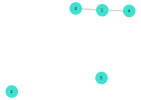

In [12]:
M,g = randomMatrix(5,0.1)
display(M)
gplot(g,nodelabel = 1:5)

In [13]:
x0 = sample(1:0.1:5,5)
t0 = 0
tf = 20
dt = 0.1

t, sol5 = cincoEspecies(x0,t0,tf,dt,M)

(0.0:0.1:20.0, [3.2 3.8 … 2.6 1.6; 2.56003429865422 4.535082665513464 … 3.022862867104515 1.7520034402053148; … ; 2.874475896830604 10.143795868255177 … 5.01112856878723 2.1714884157125973; 2.8744761311615528 10.143795868255177 … 5.0111286314699655 2.1714884157125973])

In [14]:
plot(t,sol5[:,1],label ="Especie 1",w=2,
    title = "5 Especies en competencia",
    xlabel = "Tiempo",
    ylabel = "N_(t)"
)
plot!(t,sol5[:,2],label ="Especie 2",w=2)
plot!(t,sol5[:,3],label ="Especie 3",w=2)
plot!(t,sol5[:,4],label ="Especie 4",w=2)
plot!(t,sol5[:,5],label ="Especie 5",w=2)

## 15 de febrero

Vamos a intentar corregir el modelo modificando la entrada $a_{ii}$ de la matriz A.

In [ ]:
include("../Codigo/main.jl")

In [ ]:
#A = [r1/k1 r1α/k1;r2β/k2 r2/k2]
#A = [0.5 0.7;2.1 1.2]
r = [1,1]
K = [2,3]
x0 = [1.7,0.4]
t0 = 0
tf = 50
dt = 0.01

t, sol = pruebas(x0,t0,tf,dt,r,K)

In [ ]:
p1 = plot(t,sol[:,1],label ="",w=2)
plot!(t,sol[:,2],label ="",w=2)

p2 = plot(sol[:,1],sol[:,2],w=2,
    #xlabel = "Tiempo",
    xlabel = "Conejos",
    ylabel = "Ovejas",
    label = "",
    xlim = [0,4],
    ylim = [0,4]
)
scatter!((sol[1,1],sol[1,2]),label="")
plot(p1,p2,size=(900,400))

# 27 de febrero, 2023

Regresamos a ver que pez con el código.

In [1]:
include("../Codigo/main.jl")

WebIO._IJuliaInit()

sistemaLK (generic function with 1 method)

In [2]:
#A = [r1/k1 r1α/k1;r2β/k2 r2/k2]
#A = [0.5 0.7;2.1 1.2]
r = [2,3]
K = [2,3]
x0 = sample(0:0.01:4,2)
t0 = 0
tf = 50
dt = 0.01

(t, sol), A = pruebas(x0,t0,tf,dt,r,K)

((0.0:0.01:50.0, [2.58 2.45; 2.5105226215153458 2.4221303686855125; … ; 1.2487762571705625e-15 2.999999999999992; 1.2401777001861907e-15 2.999999999999992]), [1.0 0.8969800523870062; 0.671211514237163 1.0])

In [3]:
p1 = plot(t,sol[:,1],label ="Especie 1",w=2)
plot!(t,sol[:,2],label ="Especie 2",w=2)

p2 = plot(sol[:,1],sol[:,2],w=2,
    #xlabel = "Tiempo",
    xlabel = "Conejos",
    ylabel = "Ovejas",
    label = "",
    xlim = [0,4],
    ylim = [0,4]
)
scatter!((sol[1,1],sol[1,2]),label="t0")
plot(p1,p2,size=(900,400))

In [4]:
A

2×2 Matrix{Float64}:
 1.0       0.89698
 0.671212  1.0

¡Lo logré! ya coinciden estas gráficas con el espacio fase que se encuentra en elementos básicos, ahora queda extenderlo a los otros sistemas de más especies, con la intención de que respeten su capacidad de carga.

In [5]:
x0 = rand(5)
t0 = 0
tf = 50
dt = 0.1
r = rand(5)
K = 2*ones(5)

t, sol = cincoEspecies(x0,t0,tf,dt,r,K)

(0.0:0.1:50.0, [0.8980991998624263 0.9091745777643488 … 0.3464753690640555 0.5980314801156347; 0.925268186432529 0.9274408158522809 … 0.3594109828325749 0.6187056793474839; … ; 1.76005387412444 0.7389043540591386 … 1.475051725119358 1.4988440707861417; 1.7600539083162243 0.7389037644775022 … 1.4750519655457888 1.4988441644743355])

In [6]:
plot(t,sol[:,1],label ="Especie 1",w=2)

plot!(t,sol[:,2],label ="Especie 2",w=2)
plot!(t,sol[:,3],label ="Especie 3",w=2)
plot!(t,sol[:,4],label ="Especie 4",w=2)
plot!(t,sol[:,5],label ="Especie 5",w=2)

### Ahora ya con la red aleatoria

In [4]:
include("../Codigo/main.jl")

sistemaLK (generic function with 1 method)

In [8]:
x0 = sample(0:0.01:3,5)
t0 = 0
tf = 50
dt = 0.1


p = 0.1
N = 5
#r = [2,3]
#K = [2,3]
r = 2*ones(N)
K = 3*ones(N)

params = [N,p,r,K]

(t, sol),A = poblacionesLK(x0,t0,tf,dt,params)

((0.0:0.1:50.0, [2.28 2.81 … 2.94 0.82; 2.3837016502156265 2.717996709390162 … 2.984829532629053 0.6054576364765824; … ; 2.999999999999999 2.9999999999999925 … 3.000000000000001 1.1961793174824591e-57; 2.999999999999999 2.999999999999993 … 3.000000000000001 9.207089797321026e-58]), [1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 -0.27034072441152984; 0.0 0.0 … 2.3087829776275157 1.0])

In [9]:
plot(t,sol[:,1],label ="Especie 1",w=2)

plot!(t,sol[:,2],label ="Especie 2",w=2)
plot!(t,sol[:,3],label ="Especie 3",w=2)
plot!(t,sol[:,4],label ="Especie 4",w=2)
plot!(t,sol[:,5],label ="Especie 5",w=2)

In [10]:
display(A)

5×5 Matrix{Float64}:
 1.0  0.0      0.0       0.0       0.0
 0.0  1.0      0.307113  0.0       0.0
 0.0  1.31955  1.0       0.0       0.0
 0.0  0.0      0.0       1.0      -0.270341
 0.0  0.0      0.0       2.30878   1.0

## 5 de marzo 2023

En esta ocasión vamos a visualizar el sistema resultante y sacaremos su jacobiano para determinar la estabilidad del sistema.

In [2]:
include("../Codigo/main.jl")

sistemaLK (generic function with 1 method)

In [3]:
display(sistemaLK(A,r,K))

LoadError: UndefVarError: A not defined

## 16 de marzo, 2023

Definiendo el sistema con base en las entradas aleatorias de la matriz aleatoria.

In [15]:
function sistema(X,A) 
    return  A*X
end
    
    

sistema (generic function with 1 method)

In [16]:
sistema(ones(5),A)

5-element Vector{Float64}:
 1.0
 1.3071126588098085
 2.3195514085397715
 0.7296592755884701
 3.3087829776275157

In [14]:
A*ones(5)

5-element Vector{Float64}:
 1.0
 1.3071126588098085
 2.3195514085397715
 0.7296592755884701
 3.3087829776275157

In [48]:
using NLsolve

function f!(F, x)
    F[1] = (x[1]+3)*(x[2]^3-7)+18
    F[2] = sin(x[2]*exp(x[1])-1)
end

function j!(J, x)
    J[1, 1] = x[2]^3-7
    J[1, 2] = 3*x[2]^2*(x[1]+3)
    u = exp(x[1])*cos(x[2]*exp(x[1])-1)
    J[2, 1] = x[2]*u
    J[2, 2] = u
end

nlsolve(f!, j!, [ 0.1; 1.2])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 1.2]
 * Zero: [-3.7818049096324184e-16, 1.0000000000000002]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

## 23 marzo 2023


In [1]:
include("../Codigo/main.jl")

WebIO._IJuliaInit()

circulo (generic function with 1 method)

In [13]:
x0 = [ 0.65
 1.39
 0.95
 0.42
 3.91]#sample(0:0.01:4,5)
#=A = [1.0        0.0      13.5989   -3.28364  0.0;
 0.0        1.0       0.0       6.10228  0.0;
 0.574493   0.0       1.0       2.74343  0.0;
 2.59557   -3.14685  -2.20031   1.0      0.0;
 0.0        0.0       0.0       0.0      1.0;
]=#
t0 = 0
tf = 50
dt = 0.1

p = 0.5
N = 5
#r = [2,3]
#K = [2,3]


r = 2*ones(N)
K = 3*ones(N)

params = [N,p,r,K]
(t, sol),(_,solE),A,g = poblacionesLK(x0,t0,tf,dt,params)

#(t, sol1),A = pruebas(x0,t0,tf,dt,r,K)

((0.0:0.1:50.0, [0.65 1.39 … 0.42 3.91; 0.41058798815529485 -1.6276461082700882 … 0.2116567297478191 2.462969596613418; … ; 2.999999999999999 -5.4567981556910445e-140 … 5.247969708844175e-51 3.000000000000001; 2.999999999999999 -2.9774776685162017e-140 … 4.118674466263329e-51 3.000000000000001]), (0.0:0.1:50.0, [0.65 1.39 … 0.42 3.91; 0.14968607342464346 -2.330766964011021 … 0.8900566213986665 1.0199363456456436; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN]), [1.0 7.584659885803293 … 7.9834018014911 0.0; -10.407416548892938 1.0 … -18.908193006290066 14.44205199528275; … ; 2.2115921231082303 -11.255590905427448 … 1.0 0.0; 0.0 7.3217271367118695 … 0.0 1.0], SimpleGraph{Int64}(4, [[2, 4], [1, 4, 5], Int64[], [1, 2], [2]]))

In [14]:
p1 = plot(t,sol[:,1],label ="Especie 1",w=2)

plot!(t,sol[:,2],label ="Especie 2",w=2,title="RK4")
plot!(t,sol[:,3],label ="Especie 3",w=2)
plot!(t,sol[:,4],label ="Especie 4",w=2)
plot!(t,sol[:,5],label ="Especie 5",w=2)
#=plot!(t,sol[:,6],label ="Especie 6",w=2)
plot!(t,sol[:,7],label ="Especie 7",w=2)
plot!(t,sol[:,8],label ="Especie 8",w=2)
plot!(t,sol[:,9],label ="Especie 9",w=2)
plot!(t,sol[:,10],label ="Especie 10",w=2)=#

p2 = plot(t,solE[:,1],label ="Especie 1",w=2,title="Euler")

plot!(t,solE[:,2],label ="Especie 2",w=2)
plot!(t,solE[:,3],label ="Especie 3",w=2)
plot!(t,solE[:,4],label ="Especie 4",w=2)
plot!(t,solE[:,5],label ="Especie 5",w=2)

plot(p1,p2,size=(900, 350))

In [4]:
display(A)
#gplot(g,nodelabel=1:N)

5×5 Matrix{Float64}:
   1.0     -5.57863     0.0     -8.29655   0.0
  17.6107   1.0         0.0      0.0      15.3415
   0.0      0.0         1.0      0.0      -2.93028
 -14.4244   0.0         0.0      1.0       0.0
   0.0      0.343393  -17.7604   0.0       1.0

In [5]:
x0

5-element Vector{Float64}:
 0.65
 1.39
 0.95
 0.42
 3.91

### Recordatorio

Habíamos definido en una de nuestras reuniones que la función sistemas no nos muestra como tal la serie de tiempo del sistema, porque nos estamos basando en una matriz aleatoria y en el corazón de la función, no se están poniendo las ecuaciones de LK sino solamente como se visualiza la matriz aleatoria en serie de tiempo. En otras palabras, esta función no corresponde con la serie de tiempo de la dinámica de las 5 especies.

In [6]:
x0 = sample(0:0.01:4,2)
t0 = 0
tf = 50
dt = 0.001

(t, sol) = sistemas(x0,t0,tf,dt,A)

LoadError: UndefVarError: sistemas not defined

In [7]:
plot(t,sol[:,1],label ="Especie 1",w=2)

plot!(t,sol[:,2],label ="Especie 2",w=2)
#plot!(t,sol[:,3],label ="Especie 3",w=2)
#plot!(t,sol[:,4],label ="Especie 4",w=2)
#plot!(t,sol[:,5],label ="Especie 5",w=2)

## 11 de mayo, 2023

Después de casi dos meses batallando con el sistema las conclusiones son que el sistema funciona bien, y es aplicable a cualquier tipo de sistema de $N$ especies. Sin embargo se ocupa de un reescalamiento del sistema en sus números aleatorios, ya que operar con números menores que uno afecta la dinámica de forma que excede la capacidad de carga, poner enteros facilita el problema y para ello damos un factor de escala $\times 10$ para que se ajuste adecuadamente.

En la siguiente entrada voy a investigar area plot y desarrollar más este tema del reescalamiento.


In [8]:
areaplot(t, 
    sol[:,1], 
    seriescolor = [:magenta],
    fillalpha = [0.6],
    label="Especie 1"
)
areaplot!(t, 
    sol[:,2], 
    seriescolor = [:orange],
    fillalpha = [0.5],
    label="Especie 2"
)
areaplot!(t, 
    sol[:,3], 
    seriescolor = [:red],
    fillalpha = [0.4],
    label="Especie 3"
)
areaplot!(t, 
    sol[:,4], 
    seriescolor = [:green],
    fillalpha = [0.4],
    label="Especie 4"
)
areaplot!(t, 
    sol[:,5], 
    seriescolor = [:blue],
    fillalpha = [0.3],
    label="Especie 5"
)

┌ Warning: Indices Base.OneTo(501) of attribute `seriescolor` does not match data indices 1:3.
└ @ Plots ~/.julia/packages/Plots/bMtsB/src/utils.jl:141
┌ Info: Data contains NaNs or missing values, and indices of `seriescolor` vector do not match data indices.
│ If you intend elements of `seriescolor` to apply to individual NaN-separated segments in the data,
│ pass each segment in a separate vector instead, and use a row vector for `seriescolor`. Legend entries
│ may be suppressed by passing an empty label.
│ For example,
└     plot([1:2,1:3], [[4,5],[3,4,5]], label=["y" ""], seriescolor=[1 2])
┌ Warning: Indices Base.OneTo(501) of attribute `linecolor` does not match data indices 1:3.
└ @ Plots ~/.julia/packages/Plots/bMtsB/src/utils.jl:141
┌ Info: Data contains NaNs or missing values, and indices of `linecolor` vector do not match data indices.
│ If you intend elements of `linecolor` to apply to individual NaN-separated segments in the data,
│ pass each segment in a separate vector 

┌ Warning: Indices Base.OneTo(501) of attribute `fillalpha` does not match data indices 1:4.
└ @ Plots ~/.julia/packages/Plots/bMtsB/src/utils.jl:141
┌ Info: Data contains NaNs or missing values, and indices of `fillalpha` vector do not match data indices.
│ If you intend elements of `fillalpha` to apply to individual NaN-separated segments in the data,
│ pass each segment in a separate vector instead, and use a row vector for `fillalpha`. Legend entries
│ may be suppressed by passing an empty label.
│ For example,
└     plot([1:2,1:3], [[4,5],[3,4,5]], label=["y" ""], fillalpha=[1 2])
┌ Warning: Indices Base.OneTo(501) of attribute `markercolor` does not match data indices 1:4.
└ @ Plots ~/.julia/packages/Plots/bMtsB/src/utils.jl:141
┌ Info: Data contains NaNs or missing values, and indices of `markercolor` vector do not match data indices.
│ If you intend elements of `markercolor` to apply to individual NaN-separated segments in the data,
│ pass each segment in a separate vector inst

┌ Warning: Indices Base.OneTo(501) of attribute `linecolor` does not match data indices 1:3.
└ @ Plots ~/.julia/packages/Plots/bMtsB/src/utils.jl:141
┌ Info: Data contains NaNs or missing values, and indices of `linecolor` vector do not match data indices.
│ If you intend elements of `linecolor` to apply to individual NaN-separated segments in the data,
│ pass each segment in a separate vector instead, and use a row vector for `linecolor`. Legend entries
│ may be suppressed by passing an empty label.
│ For example,
└     plot([1:2,1:3], [[4,5],[3,4,5]], label=["y" ""], linecolor=[1 2])
┌ Warning: Indices Base.OneTo(501) of attribute `fillcolor` does not match data indices 1:3.
└ @ Plots ~/.julia/packages/Plots/bMtsB/src/utils.jl:141
┌ Info: Data contains NaNs or missing values, and indices of `fillcolor` vector do not match data indices.
│ If you intend elements of `fillcolor` to apply to individual NaN-separated segments in the data,
│ pass each segment in a separate vector instead, a

┌ Warning: Indices Base.OneTo(501) of attribute `markercolor` does not match data indices 1:4.
└ @ Plots ~/.julia/packages/Plots/bMtsB/src/utils.jl:141
┌ Info: Data contains NaNs or missing values, and indices of `markercolor` vector do not match data indices.
│ If you intend elements of `markercolor` to apply to individual NaN-separated segments in the data,
│ pass each segment in a separate vector instead, and use a row vector for `markercolor`. Legend entries
│ may be suppressed by passing an empty label.
│ For example,
└     plot([1:2,1:3], [[4,5],[3,4,5]], label=["y" ""], markercolor=[1 2])
┌ Warning: Indices Base.OneTo(501) of attribute `seriescolor` does not match data indices 1:3.
└ @ Plots ~/.julia/packages/Plots/bMtsB/src/utils.jl:141
┌ Info: Data contains NaNs or missing values, and indices of `seriescolor` vector do not match data indices.
│ If you intend elements of `seriescolor` to apply to individual NaN-separated segments in the data,
│ pass each segment in a separate v

In [9]:
areaplot(1:3, [1 2 3; 7 8 9; 4 5 6], seriescolor = [:red :green :blue], fillalpha = [0.2 0.3 0.4])

#### Jacobiano del sistema

Tenemos dos tipos de derivadas parciales para este jacobiano, las de la identidad y las derivadas de la parte triangular superior e inferior.

$$
\frac{\partial f_i(x_i)}{\partial x_i}=r_i\left(1-\frac{\sum_j a_{ij}x_j}{K}\right)-\frac{r_ix_i}{K};\qquad \text{donde }a_{ii}=1
$$

y para el otro caso tenemos

$$
\frac{\partial f_i(x_j)}{\partial x_j}=-\frac{r_ix_i a_{ij}}{K}
$$

In [8]:
N = 5
r = 2*ones(N)
K = 3*ones(N)
A = ones(5,5)
P = [r,K,N,A]
Jacobiano(ones(N),P)

5×5 Matrix{Float64}:
 -2.0       -0.666667  -0.666667  -0.666667  -0.666667
 -0.666667  -2.0       -0.666667  -0.666667  -0.666667
 -0.666667  -0.666667  -2.0       -0.666667  -0.666667
 -0.666667  -0.666667  -0.666667  -2.0       -0.666667
 -0.666667  -0.666667  -0.666667  -0.666667  -2.0

In [9]:
2*(1-5/3)-2/3

-2.0

Vamos a hallar las raíces del sistema, ya tenemos construido el Jacobiano del mismo ahora solo falta verificar que funciona para el sistema de $2\times 2$. Una vez hecho eso recurrimos a generar un método de newton-rhapson generalizado en donde podamos determinar los puntos críticos del sistema. Para ello seguimos la regla recursiva

$$
v_{i+1}=v_i-(J(v_i))^{-1}f(v_i)
$$



In [10]:
#Ejemplo para el caso de una dimensión
tempCritica(T) = 2*tanh(1/T)^2 - 1 

function Dcentrada(f,a,h)
    derivada = (f(a+h) - f(a-h))/2h
    return derivada
end

function newtonRhapson(f,x_inicial,n)
    h=0.0001
    if n==1
        return x_inicial
    elseif n > 1
        iteracion = newtonRhapson(f,x_inicial,n-1)-f(newtonRhapson(f,x_inicial,n-1))/Dcentrada(f,newtonRhapson(f,x_inicial,n-1),h)
    end
    return iteracion
end

newtonRhapson (generic function with 1 method)

In [11]:
raiz = newtonRhapson(tempCritica,2,10)

1.134592657106511

In [12]:
N = 5
r = 2*ones(N)
K = 3*ones(N)
A = ones(5,5)
P = [r,K,N,A]
nrMulti(Jacobiano,rand(5),P,10)

LoadError: SingularException(2)

## 17 mayo

Vamos a poner a prueba el jacobiano y newton rhapson para ver si de verdad encontramos los puntos críticos. Para ello vamos a usar nuestro sistema de prueba de $2\times 2$ para verificar. Para ello hallamos los puntos críticos del siguiente sistema.

$$
A=\begin{pmatrix}
1 & 1\\ 
2 & 1
\end{pmatrix}
$$

El sistema de prueba que usaremos en cuestión es el siguiente.

$$
\begin{cases}
\frac{dx_1}{dt}=2x_1\left(1-\frac{x_1}{2}-\frac{x_2}{2}\right)\\
\frac{dx_2}{dt}=3x_2\left(1-\frac{2x_1}{3}-\frac{x_2}{3}\right)
\end{cases}
$$

Tiene los puntos críticos $x_1=(0,0)$, $x_2=(0,3)$, $x_3=(2,3)$, $x_4=(1,1)$. Verifiquemos.

In [13]:
include("../Codigo/main.jl")

nrMulti (generic function with 1 method)

In [14]:
N = 2
r = [2,3]
K = [2,3]
A = [1 1;2 1]
P = [r,K,N,A]
display(nrMulti(Jacobiano,[1.5,0.9],P,100))
A1 = Jacobiano([1,1],P)
display(A1)
display(eigvals(A1))

2-element Vector{Float64}:
 2.0
 0.0

2×2 Matrix{Float64}:
 -1.0  -1.0
 -2.0  -1.0

2-element Vector{Float64}:
 -2.414213562373095
  0.41421356237309515

In [15]:
N = 5
r = 2*ones(N)
K = 3*ones(N)
A,g = randomMatrix(N,0.1)
P = [r,K,N,A]
x0 = nrMulti(Jacobiano,sample(0:0.1:100,5),P,100)
display(x0)
A1 = Jacobiano(x0,P)
display(A1)
display(eigvals(A1))

5-element Vector{Float64}:
 3.0
 3.0
 3.0
 3.0
 3.0

5×5 Matrix{Float64}:
 -2.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -2.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -2.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -2.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -2.0

5-element Vector{Float64}:
 -2.0
 -2.0
 -2.0
 -2.0
 -2.0

In [16]:
A

5×5 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

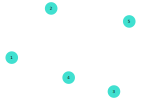

In [17]:
gplot(g,nodelabel=1:5)

## 18 de mayo, 2023

Vamos a probar todo con sistemas de $2\times 2$ y de $3\times 3$

In [1]:
include("../Codigo/main.jl")

nrMulti (generic function with 1 method)

In [2]:
x0 = sample(0:0.1:4,2)
t0 = 0
tf = 100
dt = 0.1

p = 1
N = 2
#r = [2,3]
#K = [2,3]
r = 2*ones(N)
K = 3*ones(N)

params = [N,p,r,K]
(t, sol),(_,solE),A,g = poblacionesLK(x0,t0,tf,dt,params)

LoadError: UndefVarError: sample not defined

In [1]:
plot(t,sol[:,1],label ="Especie 1")

plot!(t,sol[:,2],label ="Especie 2")

LoadError: UndefVarError: sol not defined

In [20]:
A

5×5 Matrix{Float64}:
 1.0        0.0      13.5989   -3.28364  0.0
 0.0        1.0       0.0       6.10228  0.0
 0.574493   0.0       1.0       2.74343  0.0
 2.59557   -3.14685  -2.20031   1.0      0.0
 0.0        0.0       0.0       0.0      1.0

### Para $3\times 3$

In [23]:
include("../Codigo/main.jl")

nrMulti (generic function with 1 method)

In [24]:
x0 = sample(0:0.1:4,3)
t0 = 0
tf = 50
dt = 0.1

p = 0.75
N = 3
#r = [2,3]
#K = [2,3]
r = 2*ones(N)
K = 3*ones(N)

params = [N,p,r,K]
(t, sol),(_,solE),A,g = poblacionesLK(x0,t0,tf,dt,params)

((0.0:0.1:50.0, [3.0 2.8 4.0; -2.4488867323186883 2.834250479906757 3.8991555950033967; … ; NaN NaN NaN; NaN NaN NaN]), (0.0:0.1:50.0, [3.0 2.8 4.0; -7.87912 2.837333333333333 3.273738933333333; … ; NaN NaN NaN; NaN NaN NaN]), [1.0 0.0 … -3.28364 0.0; 0.0 1.0 … 6.10228 0.0; … ; 2.59557 -3.14685 … 1.0 0.0; 0.0 0.0 … 0.0 1.0], 2)

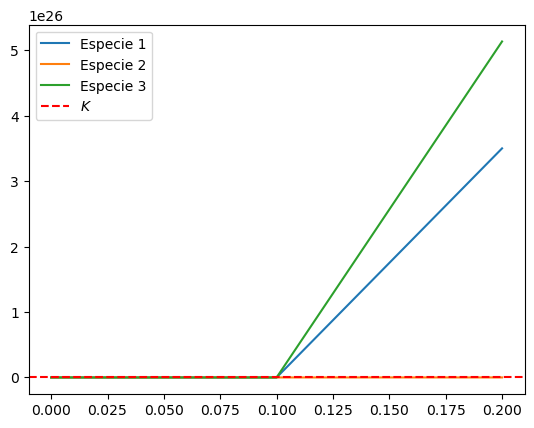

PyObject <matplotlib.legend.Legend object at 0x7f556eaa0d90>

In [3]:
plot(t,sol[:,1],label ="Especie 1")

plot(t,sol[:,2],label ="Especie 2")
plot(t,sol[:,3],label= "Especie 3")
axhline(3,c="r",linestyle="--",label=L"K")
legend()

In [4]:
xs = collect(0:0.1:10)
ys = collect(0:0.1:10)
zs = collect(0:0.1:10)

X,Y,Z = np.meshgrid(xs,ys,zs)

U = r[1]X - r[1]X.*X/K[1] - r[1]A[1,2]Y.*X/K[1] - r[1]A[1,3]Z.*X/K[3]
V = r[2]Y - r[2]A[2,1]X.*Y/K[2] - r[2]Y.*Y/K[2] - r[2]A[2,3]Z.*Y/K[3]
W = r[3]Z - r[3]A[3,1]X.*Z/K[3] - r[3]A[3,2]Y.*Z/K[3] - r[3]Z.*Z/K[3]
title("Espacio Fase")
#axhline(0,color="gray")
#axvline(0,color="gray")
quiver(X,Y,Z,U,V,W)
xlabel(L"$N_1(t)$")
ylabel(L"$N_2(t)$")
scatter(3,0, label = L"(3,0)")
scatter(0,3, label = L"(0,3)")

legend()

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/rogve98/.julia/packages/PyCall/twYvK/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'TypeError'>
TypeError('quiver() takes 2-5 positional arguments but 6 were given')
  File "/home/rogve98/anaconda3bash/lib/python3.9/site-packages/matplotlib/pyplot.py", line 2800, in quiver
    __ret = gca().quiver(
  File "/home/rogve98/anaconda3bash/lib/python3.9/site-packages/matplotlib/__init__.py", line 1412, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "/home/rogve98/anaconda3bash/lib/python3.9/site-packages/matplotlib/axes/_axes.py", line 4981, in quiver
    q = mquiver.Quiver(self, *args, **kwargs)
  File "/home/rogve98/anaconda3bash/lib/python3.9/site-packages/matplotlib/quiver.py", line 465, in __init__
    X, Y, U, V, C = _parse_args(*args, caller_name='quiver()')
  File "/home/rogve98/anaconda3bash/lib/python3.9/site-packages/matplotlib/quiver.py", line 407, in _parse_args
    raise TypeError(f'{caller_name} takes 2-5 positional arguments but '


## 26 de mayo, 2023

In [1]:
include("../Codigo/main.jl")

WebIO._IJuliaInit()

circulo (generic function with 1 method)

### Tarea 3 b)

Tratar de generar un LK estable de 100x100 para  graficar su eigen-valores.

Esta hazaña no es tan sencilla puesto que la probabilidad óptima para que sea susceptible la estabilidad va en función de 

$$
p<\frac{1}{N},\qquad\text{donde $p$ es igual a la probabilidad de interacción}
$$

Transportando eso a 100 especies, nos da espacio para trabajar con probabilidades de $p=0.01$ y aún así hay que ver si funciona.

In [126]:
x0 = sample(0:0.01:4,5)
t0 = 0
tf = 50
dt = 0.1

N = 5
p = 0.5
r = 2*ones(N)
K = 3*ones(N)

params = [N,p,r,K]
(t, sol),_,A,g = poblacionesLK(x0,t0,tf,dt,params)
#(t, sol1),A = pruebas(x0,t0,tf,dt,r,K)

((0.0:0.1:50.0, [0.88 2.58 … 1.11 2.17; 1.0092862353145045 1.770912746993073 … 0.8868872558085971 2.6840430465353724; … ; 2.999999999999999 1.9679483464776754e-135 … 8.744123569979871e-149 3.000000000000001; 2.999999999999999 1.0543482042779918e-135 … 4.408245968333257e-149 3.000000000000001]), (0.0:0.1:50.0, [0.88 2.58 … 1.11 2.17; 1.0043733333333333 1.8068071926553912 … 1.0288615844271645 2.9121219235679163; … ; 2.999999999999999 2.6359328569194283e-212 … 3.3027304292234766e-251 2.999999999999999; 2.999999999999999 9.873790184789626e-213 … 1.033171469268483e-251 2.999999999999999]), [1.0 0.0 … 0.0 0.0; 0.0 1.0 … -3.6400482100531684 4.127078586453648; … ; 0.0 -2.573411117364468 … 1.0 4.435882837838211; 0.0 -6.69956141247984 … 11.698192249093239 1.0], SimpleGraph{Int64}(3, [Int64[], [4, 5], Int64[], [2, 5], [2, 4]]))

In [127]:
p1 = plot(t,sol[:,1],label ="Especie 1",w=2)

plot!(t,sol[:,2],label ="Especie 2",w=2,title="RK4")
plot!(t,sol[:,3],label ="Especie 3",w=2)
plot!(t,sol[:,4],label ="Especie 4",w=2)
plot!(t,sol[:,5],label ="Especie 5",w=2)
#=plot!(t,sol[:,6],label ="Especie 6",w=2)
plot!(t,sol[:,7],label ="Especie 7",w=2)
plot!(t,sol[:,8],label ="Especie 8",w=2)
plot!(t,sol[:,9],label ="Especie 9",w=2)
plot!(t,sol[:,10],label ="Especie 10",w=2)=#


plot(p1,size=(900, 350))

In [128]:
A

5×5 Matrix{Float64}:
 1.0   0.0      0.0   0.0      0.0
 0.0   1.0      0.0  -3.64005  4.12708
 0.0   0.0      1.0   0.0      0.0
 0.0  -2.57341  0.0   1.0      4.43588
 0.0  -6.69956  0.0  11.6982   1.0

In [129]:
x0

5-element Vector{Float64}:
 0.88
 2.58
 2.31
 1.11
 2.17

In [130]:
P = [r,K,N,A]
raices = nrMulti(Jacobiano,sample(0:0.1:4,5),P,100)
J = Jacobiano(raices,P)
eig = eigvals(J)
print("Raices:")
display(raices)
print("Jacobiano evaluado. Matriz de interacciones")
display(J)
print("Eigenvalores del sistema")
display(eig)

Raices:

5-element Vector{Float64}:
 3.0
 0.0
 3.0
 3.0
 0.0

Jacobiano evaluado. Matriz de interacciones

5×5 Matrix{Float64}:
 -2.0  -0.0      -0.0  -0.0   -0.0
 -0.0   9.2801   -0.0   0.0   -0.0
 -0.0  -0.0      -2.0  -0.0   -0.0
 -0.0   5.14682  -0.0  -2.0   -8.87177
 -0.0   0.0      -0.0  -0.0  -21.3964

Eigenvalores del sistema

5-element Vector{Float64}:
 -21.396384498186478
  -2.0
  -2.0
  -2.0
   9.280096420106336

In [131]:
r = sqrt(N*p)
d = -2
scatter(real(eig),imag(eig))
plot!(circulo(d,0,r),seriestype=:shape,
    lw=0.5,
    c = :blue,
    linecolor = :black,
    legend = false,
    fillalpha = 0.2,
    aspect_ratio = 1
)

### Tarea 3 a)

Generar 30 Matrices aleatorias (Jacobianos) de 100x100 y graficar su eigen-valores. Para este caso vamos a aplicar la metodología del May, en donde se salta todos los pasos para llegar al jacobiano y solo considera las matrices aleatorias como matrices de interacción. Sin embargo deben cumplir cierto criterio que dice que la diagonal debe ir con números de la forma $-d$; esto con el objetivo de simular una capacidad de carga en las redes, en donde las especies interactuén consigo mismas negativamente (?).

Para ello es necesario generar una nueva función, ya que randomMatrix no considera ese caso.

In [140]:
include("../Codigo/main.jl")

circulo (generic function with 1 method)

In [146]:
N = 100
p = 0.25

J,g = interacciones(N,p,1)

([-0.2 0.0 … 0.0 0.0; 0.0 -0.2 … 0.0 0.0; … ; 0.0 0.0 … -0.2 0.0; 0.0 0.0 … 0.0 -0.2], SimpleGraph{Int64}(1264, [[7, 8, 10, 11, 29, 36, 50, 62, 63, 65, 73, 78, 79, 89, 92, 94, 97], [14, 16, 17, 21, 26, 27, 30, 32, 34, 45, 46, 56, 63, 64, 67, 69, 76, 80, 87, 89], [6, 10, 15, 23, 26, 35, 48, 49, 51, 52  …  71, 72, 75, 78, 80, 81, 86, 96, 98, 100], [11, 23, 24, 25, 27, 29, 30, 33, 38, 39  …  65, 66, 68, 72, 78, 81, 83, 90, 92, 96], [7, 11, 13, 18, 28, 29, 30, 34, 35, 37  …  59, 70, 72, 73, 83, 85, 88, 92, 94, 100], [3, 9, 10, 16, 18, 23, 25, 28, 29, 31  …  72, 73, 75, 83, 85, 86, 92, 96, 97, 98], [1, 5, 9, 11, 13, 18, 21, 25, 26, 28  …  63, 64, 66, 71, 72, 73, 84, 87, 98, 99], [1, 12, 18, 20, 23, 28, 29, 32, 33, 39  …  70, 79, 81, 85, 86, 89, 93, 97, 98, 100], [6, 7, 10, 12, 15, 16, 17, 18, 20, 23  …  75, 77, 79, 80, 81, 86, 89, 96, 98, 100], [1, 3, 6, 9, 16, 18, 23, 28, 39, 41  …  57, 65, 71, 75, 79, 85, 86, 92, 96, 100]  …  [13, 21, 29, 31, 34, 39, 42, 43, 46, 50, 53, 56, 57, 68, 70, 71

100×100 Matrix{Float64}:
 -0.2         0.0        0.0       …   0.0         0.0         0.0
  0.0        -0.2        0.0           0.0         0.0         0.0
  0.0         0.0       -0.2          -0.0586148   0.0         0.15862
  0.0         0.0        0.0           0.0         0.0         0.0
  0.0         0.0        0.0           0.0         0.0        -0.356525
  0.0         0.0       -0.309853  …   0.119461    0.0         0.0
 -0.362689    0.0        0.0          -0.0292809   0.439296    0.0
  0.0859533   0.0        0.0           0.0108149   0.0         0.0968815
  0.0         0.0        0.0          -0.11293     0.0        -0.107212
  0.174172    0.0        0.211623      0.0         0.0        -0.129052
  0.0231418   0.0        0.0       …   0.0         0.0125067   0.0395391
  0.0         0.0        0.0           0.0         0.0888878  -0.0994841
  0.0         0.0        0.0           0.0         0.0        -0.127999
  ⋮                                ⋱                          

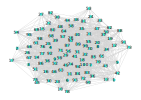

In [147]:
display(J)
#display(collect(enlacesAleatorios(N,p)))
gplot(g,nodelabel=1:N)

In [148]:
ev = eigvals(J)

100-element Vector{ComplexF64}:
 -1.1828042875104425 - 0.48517348993805587im
 -1.1828042875104425 + 0.48517348993805587im
 -1.1737650636704033 + 0.0im
 -1.1529441151872206 + 0.0im
  -1.041295273832863 - 0.22554552693659877im
  -1.041295273832863 + 0.22554552693659877im
 -0.9586756006692049 + 0.0im
 -0.9374314221250234 - 0.17457526089034897im
 -0.9374314221250234 + 0.17457526089034897im
 -0.8025759058296147 - 0.2600162812235533im
 -0.8025759058296147 + 0.2600162812235533im
 -0.7928745243223536 - 0.5290677211143068im
 -0.7928745243223536 + 0.5290677211143068im
                     ⋮
  0.4232867687292658 + 0.19597145276587877im
 0.44818621185977103 - 0.4710399674519206im
 0.44818621185977103 + 0.4710399674519206im
  0.4952736023119594 - 0.06937179722619927im
  0.4952736023119594 + 0.06937179722619927im
  0.6657715495997836 - 0.5123683164702159im
  0.6657715495997836 + 0.5123683164702159im
  0.6875938557641326 - 0.2539896403745357im
  0.6875938557641326 + 0.2539896403745357im
  0.691495290

In [149]:
r = sqrt(N*p)
scatter(real(ev),imag(ev))
plot!(circulo(-1/sqrt(N*p),0,1),seriestype=:shape,
    lw=0.5,
    c = :blue,
    linecolor = :black,
    legend = false,
    fillalpha = 0.2,
    aspect_ratio = 1
)

In [145]:
sqrt(N*p)

1.0

### Vamos a jugar con distribuciones normales

Siendo su definición general

$$
f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

In [71]:
normal(σ,μ,x) = exp(-(x-μ)^2/(2σ^2))/(σ*sqrt(2π))

normal (generic function with 2 methods)

In [139]:
xs = range(-10, stop = 10, length = 500)
ys = [normal(1,0,x) for x in xs]

plot(xs ,ys)

In [124]:
r = randn(1000)
histogram(r,bins=100)

In [136]:
d = Normal(0,5)
r = rand(d,1000)
histogram(r,bins=50)

## 3 de junio, 2023

Vamos a seguir con las tareas precisas de la ley circulas tanto con matrices de interacción como con el modelo completo. Primero vamos a verificar lo del artículo de steffano y de ahí vemos como nos movemos con el modelo completo.

Las reglas primordiales de la ley circular que se propone en el artículo es que las matrices en su diagonal son de la forma $M_{ii}=-d$ para representar la capacidad de carga del sistema, es como una muestra de autoregulación; estos términos son importantes ya que si llegan a cambiar, el centro de la ley circular es complejo de definir (como pasa con los jacobianos del sistema completo). Los términos fuera de la diagonal son de la forma

$$
\begin{cases}
M_{ij} = r\qquad\text{con una probabilidad de }p\\
M_{ij} = 0\qquad\text{con la probabilidad }1-p
\end{cases}
$$

Ya de ahí definimos el centro de la ley círcular como $-d$ y el radio como $\sqrt{Np}$. Sin embargo optamos por normalizar las cantidades de forma que  el radio del círculo es unitario y la matriz de interacciones se ve como $\textbf{M}/\sqrt{Np}$

Por tanto vamos a probar todo esto para distintas distribuciones y confirmar la ley circular. Trabajaremos con 100 especies con una conectividad del 50%, es decir, probabilidad de 0.5. Un detalle interesante emerge cuando $p=1/N$.

In [1]:
include("../Codigo/main.jl")

WebIO._IJuliaInit()

circulo (generic function with 1 method)

In [2]:
N = 100
p = 0.5

J1,g1 = interacciones(N,p,1,1)
J2,g2 = interacciones(N,p,1,10)

([-1.414213562373095 0.0 … 0.0032695667642618138 -0.14459764798920774; 0.0 -1.414213562373095 … 0.0 0.0; … ; 0.13012990680794628 0.0 … -1.414213562373095 0.0; 0.11904046732353435 0.0 … 0.0 -1.414213562373095], SimpleGraph{Int64}(2475, [[5, 6, 8, 11, 14, 17, 18, 20, 21, 22  …  80, 81, 82, 84, 89, 92, 94, 96, 99, 100], [6, 8, 9, 10, 11, 14, 16, 17, 20, 22  …  78, 80, 81, 83, 86, 88, 90, 92, 93, 98], [4, 5, 7, 8, 10, 11, 13, 18, 22, 23  …  79, 84, 86, 91, 92, 93, 94, 95, 98, 100], [3, 5, 6, 9, 12, 13, 15, 16, 20, 21  …  84, 87, 89, 92, 93, 94, 95, 97, 98, 100], [1, 3, 4, 7, 8, 13, 14, 15, 17, 18  …  85, 86, 87, 90, 92, 93, 97, 98, 99, 100], [1, 2, 4, 7, 8, 14, 15, 18, 19, 20  …  82, 83, 84, 89, 91, 93, 95, 96, 99, 100], [3, 5, 6, 10, 11, 12, 16, 17, 20, 22  …  87, 88, 89, 90, 91, 92, 93, 94, 95, 96], [1, 2, 3, 5, 6, 9, 12, 14, 15, 17  …  74, 76, 81, 83, 85, 87, 88, 90, 92, 99], [2, 4, 8, 11, 15, 18, 21, 22, 24, 27  …  77, 78, 83, 84, 86, 87, 91, 92, 96, 100], [2, 3, 7, 12, 13, 14, 16, 17,

In [3]:
ev1 = eigvals(J1)
ev2 = eigvals(J2)

100-element Vector{ComplexF64}:
   -2.541000736873899 + 0.0im
  -2.3261748467698955 - 0.29973061573667087im
  -2.3261748467698955 + 0.29973061573667087im
  -2.2622711684217083 - 0.04817382289874044im
  -2.2622711684217083 + 0.04817382289874044im
   -2.233836043661268 - 0.39229573595362066im
   -2.233836043661268 + 0.39229573595362066im
   -2.173793276006867 + 0.0im
   -2.060598701751176 - 0.2909584104475732im
   -2.060598701751176 + 0.2909584104475732im
  -2.0094846280880048 - 0.5422440804638806im
  -2.0094846280880048 + 0.5422440804638806im
  -1.9823048684970723 - 0.6391650341678832im
                      ⋮
  -0.7943532337213601 - 0.16225841437829538im
  -0.7943532337213601 + 0.16225841437829538im
  -0.7434419455392428 + 0.0im
  -0.6547697075309231 + 0.0im
  -0.6383880006822056 - 0.15888585076069184im
  -0.6383880006822056 + 0.15888585076069184im
  -0.6319251931192396 - 0.5889116940272872im
  -0.6319251931192396 + 0.5889116940272872im
  -0.5587205310746879 - 0.3944644241056136im
  -0

In [4]:
r = sqrt(N*p)
scatter(real(ev1),imag(ev1))
plot!(circulo(-1/sqrt(N*p),0,1),seriestype=:shape,
    lw=0.5,
    c = :blue,
    linecolor = :black,
    legend = false,
    fillalpha = 0.2,
    aspect_ratio = 1
)

In [5]:
r = sqrt(N*p)
scatter(real(ev2),imag(ev2),color="red")
plot!(circulo(-1.41421,0,1),seriestype=:shape,
    lw=0.5,
    c = :red,
    linecolor = :black,
    legend = false,
    fillalpha = 0.2,
    aspect_ratio = 1
)